# Titanic Survival Prediction

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [79]:
df= pd.read_csv('tested.csv')

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [82]:
df.shape

(418, 12)

In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [84]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

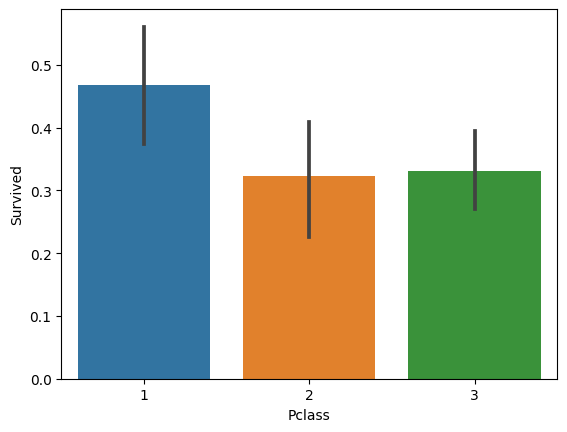

In [85]:
sns.barplot(x='Pclass',y='Survived', data=df)

<Axes: ylabel='Survived'>

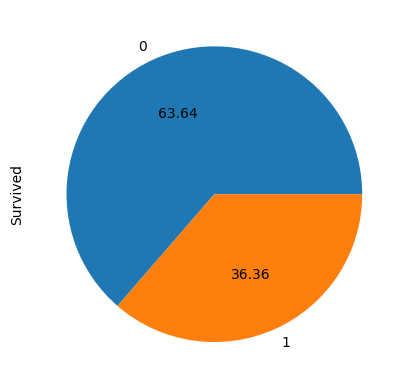

In [86]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: >

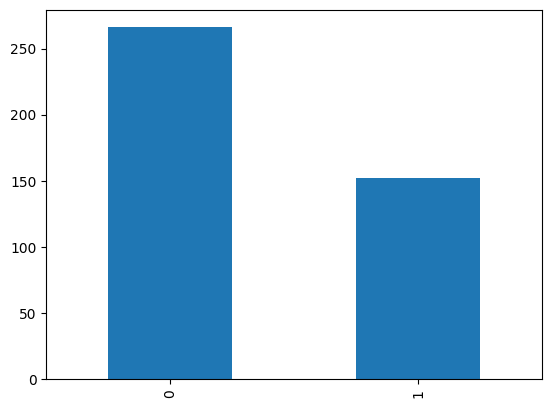

In [87]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

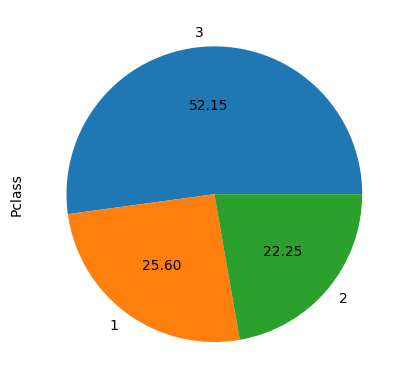

In [88]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

In [89]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)

In [90]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,34.5
1,1,3,female,47.0
2,0,2,male,62.0
3,0,3,male,27.0
4,1,3,female,22.0


In [91]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [92]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
dtype: int64

In [93]:
df.shape

(418, 4)

In [94]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
dtype: object

In [95]:
inputs = df.drop('Survived', axis='columns')
target=df.Survived

In [96]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,0,1


In [97]:
inputs= pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,female,male
0,3,male,34.5,0,1
1,3,female,47.0,1,0
2,2,male,62.0,0,1


In [98]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,female,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1


In [99]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [100]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,female,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0
5,3,14.0,0,1


In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(inputs,target,test_size=0.2)

In [102]:
len(X_train)

334

In [103]:
len(X_test)

84

In [104]:
len(inputs)

418

In [105]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

In [106]:
model.fit(X_train,y_train)

GaussianNB()

In [107]:
model.score(X_test,y_test)

1.0

In [108]:
X_test[:10]

,Pclass,Age,female,male
301,2,30.27259,0,1
166,1,48.00000,0,1
372,1,49.00000,0,1
352,2,18.00000,0,1
237,3,20.00000,0,1
397,1,48.00000,1,0
391,1,51.00000,1,0
14,1,47.00000,1,0
260,3,36.50000,0,1
142,1,61.00000,0,1


In [109]:
y_test[:10]

301    0
166    0
372    0
352    0
237    0
397    1
391    1
14     1
260    0
142    0
Name: Survived, dtype: int64

In [110]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [111]:
model.predict_proba(X_test[:10])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [112]:
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [113]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
model.score(X_test,y_test)

1.0

In [115]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [116]:
model.score(X_test,y_test)

1.0

In [117]:
y_predicted= model.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[48,  0],
       [ 0, 36]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

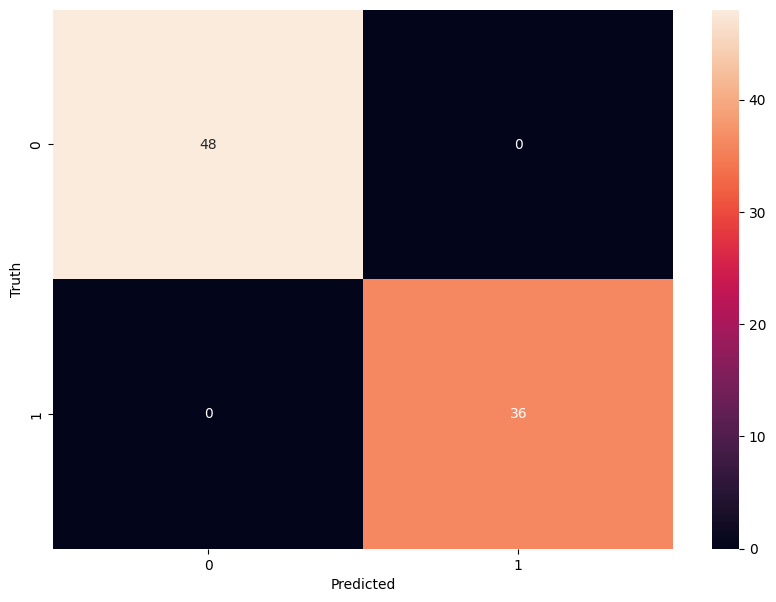

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')